In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Ellipse
import os
import scipy as ss
import scipy.stats
%matplotlib inline
import itertools
import seaborn as sns
from sklearn.decomposition import PCA

import visualization_functions as vis

# col1 = "#f93c3c"
# col2 = "#009a7f"
# col3 = "#9fa8ab"
# col5 = "#00490c"
# col4 = "#f4d895"


col1 = "#f34236"
col2 = "#d6c571"
col3 = "#88bc67"
col4 = "#2e8174"
col5 = "#143969"

colors = [col1, col2, col3, col4, col5]

counts_file = "/Users/annasintsova/git_repos/spatial_dynamics_of_gene_expression_in_response_to_T6SS_attack/"\
              "data/counts/reverse/2018-04-25_counts.csv"
    
rpkm_file = "/Users/annasintsova/git_repos/spatial_dynamics_of_gene_expression_in_response_to_T6SS_attack/"\
            "data/counts/reverse/2018-04-25_rpkm.csv"
    
study_design_file = "/Users/annasintsova/git_repos/spatial_dynamics_of_gene_expression_in_response_to_T6SS_attack/"\
                    "data/ref/study_design.csv"


figures_folder = "/Users/annasintsova/git_repos/spatial_dynamics_of_gene_expression_in_response_to_T6SS_attack/figures/"

rpkms = pd.read_csv(rpkm_file, index_col=0)
rpkms.columns = [c.split("_")[0] for c in rpkms.columns]

meta = pd.read_csv(study_design_file, index_col=0)
meta.index = [i.split("S")[1] for i in meta.index]

wt = "WT"
mut = "9C1"

mut_L = "Dienes Line"
wt_L = "Merge"

bh_mut = "Behind Dienes Line"
bh_wt = "Behind Swarm Front"

thirty = "30 min"
zero = "0 min"
four = "4 hrs"

samples = {"Case1":"{} | {}".format(wt_L, zero),
           "Case2":"{} | {}".format(wt_L, four),
            "Case3":"{} | {}".format(mut_L, zero), 
          "Case4":"{} | {}".format(mut_L, four)}


In [29]:
rpkms = pd.read_csv(rpkm_file, index_col=0)
rpkms.columns = [c.split("_")[0] for c in rpkms.columns]
meta = pd.read_csv(study_design_file, index_col=0)
meta.index = [i.split("S")[1] for i in meta.index]
old_meta = meta[meta["lane.ID"]=="L1"]
old_rpkms = rpkms[old_meta.index]
old_meta["time.point"] = old_meta["time.point"].str.replace("0''", "0 min")
old_meta["time.point"] = old_meta["time.point"].str.replace("4'", "4 hrs")
old_meta["position"] = old_meta["position"].str.replace("L-HI", wt_L)
old_meta["position"] = old_meta["position"].str.replace("L-9C", mut_L)
old_meta

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-

,lane.ID,group.ID,time.point,strain.ID,position,RIN
63630,L1,Case1,0 min,HI,Merge,NaN
63631,L1,Case1,0 min,HI,Merge,NaN
63632,L1,Case1,0 min,HI,Merge,NaN
63633,L1,Case2,4 hrs,HI,Merge,NaN
63634,L1,Case2,4 hrs,HI,Merge,NaN
63635,L1,Case2,4 hrs,HI,Merge,NaN
63636,L1,Case3,0 min,Mix,Dienes Line,NaN
63638,L1,Case3,0 min,Mix,Dienes Line,NaN
63639,L1,Case4,4 hrs,Mix,Dienes Line,NaN
63641,L1,Case4,4 hrs,Mix,Dienes Line,NaN


In [30]:
rpkms_norm = old_rpkms.apply(vis.invnorm)

In [31]:
pDf, pc1_var, pc2_var = vis.findTwoComponents(rpkms_norm, old_meta)
pDf

,PC1,PC2,lane.ID,group.ID,time.point,strain.ID,position,RIN
63630,12.850762,-3.681407,L1,Case1,0 min,HI,Merge,NaN
63631,11.895349,-3.585211,L1,Case1,0 min,HI,Merge,NaN
63632,7.783358,-5.347216,L1,Case1,0 min,HI,Merge,NaN
63633,-10.474722,1.088593,L1,Case2,4 hrs,HI,Merge,NaN
63634,-13.016898,1.656313,L1,Case2,4 hrs,HI,Merge,NaN
63635,-13.607766,1.006410,L1,Case2,4 hrs,HI,Merge,NaN
63636,19.760121,12.465392,L1,Case3,0 min,Mix,Dienes Line,NaN
63638,6.959542,-5.715544,L1,Case3,0 min,Mix,Dienes Line,NaN
63639,-9.354080,-0.370121,L1,Case4,4 hrs,Mix,Dienes Line,NaN
63641,-12.795666,2.482790,L1,Case4,4 hrs,Mix,Dienes Line,NaN


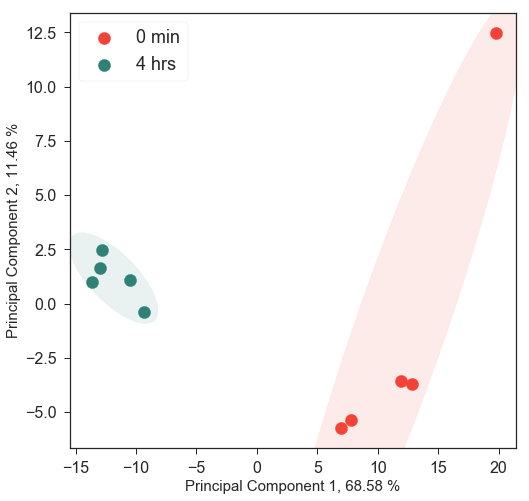

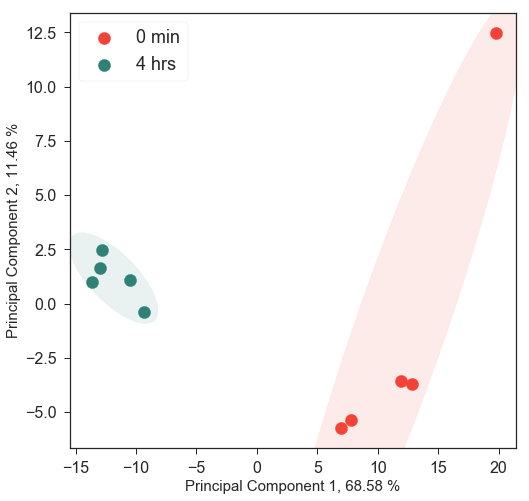

In [33]:
fn = os.path.join(figures_folder, "2018-07-02-proteus_rnaseq_figure_2a.png")
vis.plotPCA(pDf, pc1_var, pc2_var,"time.point", c=[col1, col4],
        filename=fn, el=True)

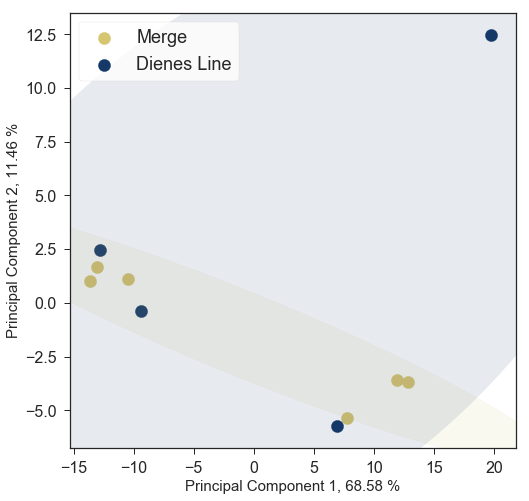

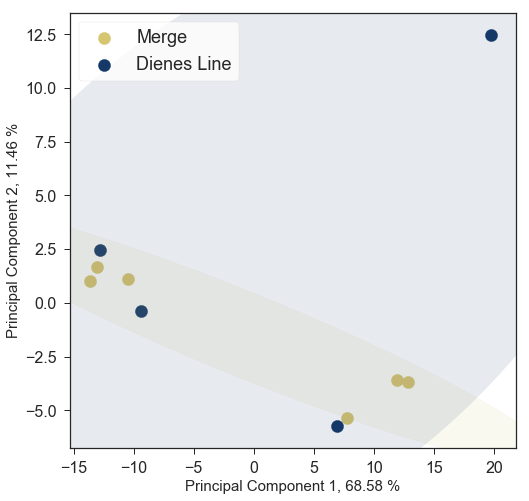

In [34]:
fn = os.path.join(figures_folder, "2018-07-02-proteus_rnaseq_figure_2b.png")
vis.plotPCA(pDf, pc1_var, pc2_var,"position", c=[col2,col5], filename=fn,el=True)

In [7]:
###
rpkms_norm.to_csv("normailzed_rpkms_old_samples.csv")

       Kan RPKM lane.ID group.ID time.point strain.ID     position  RIN  \
63630      0.00      L1    Case1      0 min        HI        Merge  NaN   
63631      0.00      L1    Case1      0 min        HI        Merge  NaN   
63632      0.00      L1    Case1      0 min        HI        Merge  NaN   
63633      0.00      L1    Case2      4 hrs        HI        Merge  NaN   
63634      0.10      L1    Case2      4 hrs        HI        Merge  NaN   
63636    124.28      L1    Case3      0 min       Mix  Dienes Line  NaN   
63638    189.39      L1    Case3      0 min       Mix  Dienes Line  NaN   
63639      9.25      L1    Case4      4 hrs       Mix  Dienes Line  NaN   
63641     82.26      L1    Case4      4 hrs       Mix  Dienes Line  NaN   

                   samples  
63630        Merge | 0 min  
63631        Merge | 0 min  
63632        Merge | 0 min  
63633        Merge | 4 hrs  
63634        Merge | 4 hrs  
63636  Dienes Line | 0 min  
63638  Dienes Line | 0 min  
63639  Dienes Lin

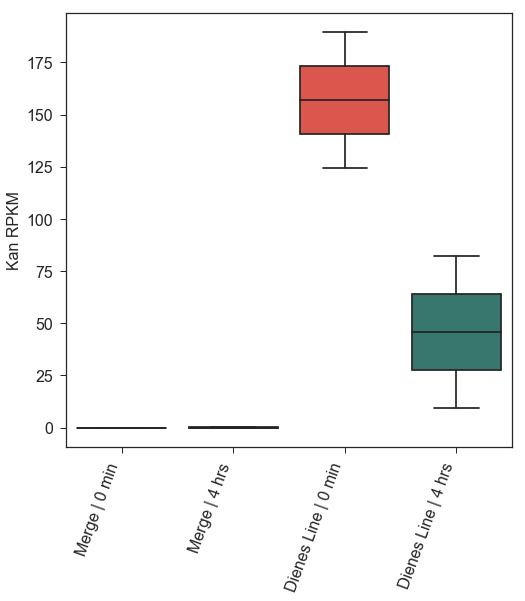

In [35]:
mk_file = "/Users/annasintsova/git_repos/proteus/analysis/mutant_killing/rpkm/kan_rpkms.csv"
mk = pd.read_csv(mk_file, index_col=0, names=["Kan RPKM"])
mk.index = [i.strip("S") for i in mk.index]
mk = pd.merge(mk, old_meta, left_index=True, right_index=True)
mk["samples"] = [samples[i] for i in mk["group.ID"]]
print(mk)
fig = plt.figure(figsize = (8,8))
order = [samples["Case1"], samples["Case2"], samples["Case3"], samples["Case4"]]
ax = sns.boxplot(x= "samples", y="Kan RPKM", data = mk, palette=[col2, col5, col1, col4], order=order);
plt.yticks(fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 70, fontsize = 16,ha="right")
ax.set_xlabel("")
ax.set_ylabel(ax.get_ylabel(), fontsize=16)
fig.savefig(os.path.join(figures_folder, "2018-07-02-proteus_rnaseq_figure_2c.png"), dpi=300, bbox_inches="tight")